In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Input
from PIL import Image

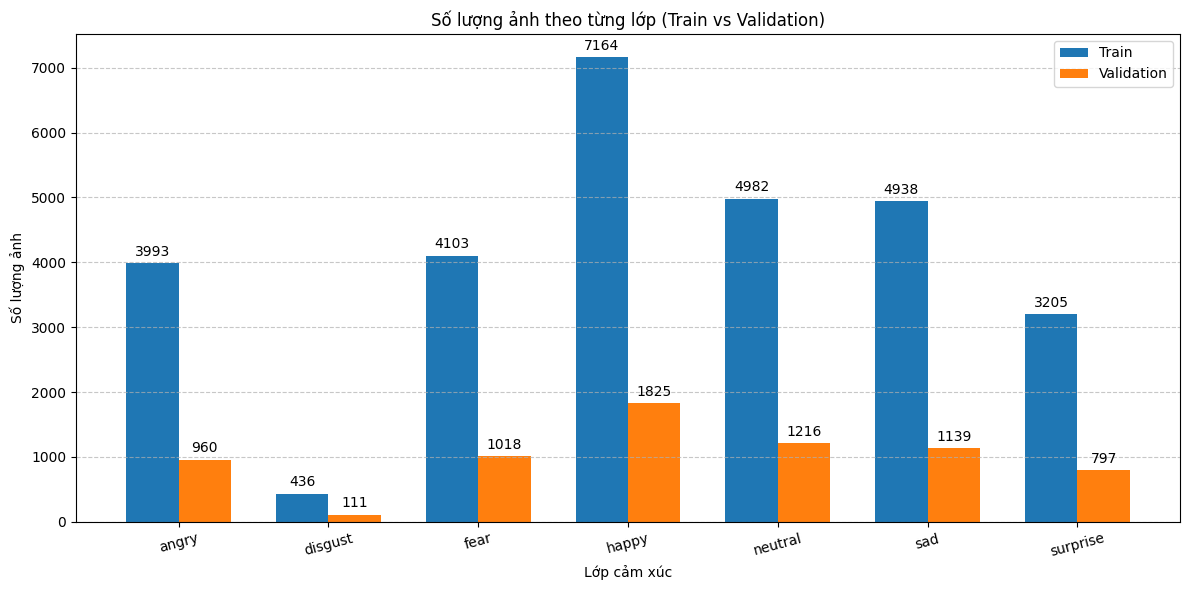

In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Đường dẫn
train_dir = 'D:/DatasetDoAnCoSO/dataset_emotion/images/train'
val_dir = 'D:/DatasetDoAnCoSO/dataset_emotion/images/validation'

# Lấy danh sách lớp
classes = os.listdir(train_dir)
train_counts = []
val_counts = []

# Đếm ảnh
for cls in classes:
    train_path = os.path.join(train_dir, cls)
    val_path = os.path.join(val_dir, cls)

    train_count = len(os.listdir(train_path)) if os.path.exists(train_path) else 0
    val_count = len(os.listdir(val_path)) if os.path.exists(val_path) else 0

    train_counts.append(train_count)
    val_counts.append(val_count)

# Vẽ biểu đồ
x = np.arange(len(classes))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, train_counts, width, label='Train')
rects2 = ax.bar(x + width/2, val_counts, width, label='Validation')

ax.set_ylabel('Số lượng ảnh')
ax.set_xlabel('Lớp cảm xúc')
ax.set_title('Số lượng ảnh theo từng lớp (Train vs Validation)')
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=15)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị số lượng trên đầu mỗi cột
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 điểm pixel lên trên
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [3]:
import json
# Đường dẫn
train_dir = 'D:/DatasetDoAnCoSO/dataset_emotion/images/train'
val_dir = 'D:/DatasetDoAnCoSO/dataset_emotion/images/validation'

train_datagen = ImageDataGenerator(
        rescale = 1.0/255.0,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        rotation_range = 20,
        horizontal_flip = True
    )

validation_datagen = ImageDataGenerator(
    rescale= 1.0/255
)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(56,56),
    color_mode="grayscale",
    batch_size=16,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(56,56),
    color_mode="grayscale",
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)


# Lưu thông tin về generator vào file JSON
generator_part2 = {
    "train_generator": {
        "target_size": train_generator.target_size,
        "color_mode": train_generator.color_mode,
        "batch_size": train_generator.batch_size,
        "class_mode": train_generator.class_mode,
        "num_classes": len(train_generator.class_indices),
        "class_labels": list(train_generator.class_indices.keys())
    },
    "validation_generator": {
        "target_size": validation_generator.target_size,
        "color_mode": validation_generator.color_mode,
        "batch_size": validation_generator.batch_size,
        "class_mode": validation_generator.class_mode,
        "num_classes": len(validation_generator.class_indices),
        "class_labels": list(validation_generator.class_indices.keys())
    }
}

# Lưu vào file JSON
with open('generator_part2.json', 'w') as json_file:
    json.dump(generator_part2, json_file, indent=4)

print("File generator_info.json đã được tạo!")

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
File generator_info.json đã được tạo!


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras.models import Sequential
from keras.optimizers import Adam

# Khởi tạo mô hình mạng nơ-ron tích chập (CNN)
model = Sequential()

# 1 - Lớp tích chập đầu tiên
model.add(Conv2D(64, (3,3), padding='same', input_shape=(56, 56, 1)))  # Lớp tích chập với 64 bộ lọc kích thước 3x3
model.add(BatchNormalization())  # Chuẩn hóa dữ liệu đầu ra của lớp tích chập
model.add(Activation('relu'))    # Áp dụng hàm kích hoạt ReLU
model.add(MaxPooling2D(pool_size=(2, 2)))  # Lớp lấy mẫu cực đại 2x2
model.add(Dropout(0.25))  # Ngẫu nhiên bỏ 25% số lượng nơ-ron để tránh hiện tượng quá khớp

# 2 - Lớp tích chập thứ hai
model.add(Conv2D(128, (5,5), padding='same'))  # 128 bộ lọc kích thước 5x5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3 - Lớp tích chập thứ ba
model.add(Conv2D(512, (3,3), padding='same'))  # 512 bộ lọc kích thước 3x3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4 - Lớp tích chập thứ tư
model.add(Conv2D(512, (3,3), padding='same'))  # 512 bộ lọc kích thước 3x3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Chuyển từ dữ liệu 2 chiều sang 1 chiều (làm phẳng)
model.add(Flatten())

# 5 - Lớp Fully Connected thứ nhất
model.add(Dense(256))  # Lớp kết nối với 256 nơ-ron
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# 6 - Lớp Fully Connected thứ hai
model.add(Dense(512))  # Lớp kết nối với 512 nơ-ron
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# 7 - Lớp Input 
model.add(Dense(7, activation='softmax'))  # 7 đầu ra ứng với 7 cảm xúc, dùng hàm kích hoạt softmax để phân loại

# In ra tóm tắt mô hình
print(model.summary())

# Khởi tạo bộ tối ưu hóa Adam với tốc độ học nhỏ
opt = Adam(learning_rate=0.0001)

# Biên dịch mô hình, xác định thuật toán tối ưu, hàm mất mát và chỉ số đánh giá
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


c:\Program Files\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 56, 56, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 7, 7, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,02

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

None


In [5]:
from keras.callbacks import ModelCheckpoint
epochs = 750  # Số lượng epochs để huấn luyện mô hình

# Tạo callback để lưu trọng số tốt nhất
checkpoint = ModelCheckpoint("model_weights.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Huấn luyện mô hình
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    callbacks=callbacks_list
)

# Lưu toàn bộ mô hình (bao gồm kiến trúc, trọng số, optimizer)
model.save("full_model_notEarlyStopPart2.keras")  # <-- lưu toàn bộ model dưới định dạng chuẩn mới (.keras)

c:\Program Files\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/750
1801/1801 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.2088 - loss: 2.0713
Epoch 1: val_accuracy improved from -inf to 0.29730, saving model to model_weights.keras
1801/1801 ━━━━━━━━━━━━━━━━━━━━ 481s 265ms/step - accuracy: 0.2088 - loss: 2.0713 - val_accuracy: 0.2973 - val_loss: 1.7316
Epoch 2/750
   1/1801 ━━━━━━━━━━━━━━━━━━━━ 5:12 174ms/step - accuracy: 0.1875 - loss: 1.9280

c:\Program Files\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.29730 to 0.29773, saving model to model_weights.keras
1801/1801 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.1875 - loss: 1.9280 - val_accuracy: 0.2977 - val_loss: 1.7318
Epoch 3/750
1801/1801 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.2505 - loss: 1.8747
Epoch 3: val_accuracy improved from 0.29773 to 0.35696, saving model to model_weights.keras
1801/1801 ━━━━━━━━━━━━━━━━━━━━ 337s 187ms/step - accuracy: 0.2506 - loss: 1.8747 - val_accuracy: 0.3570 - val_loss: 1.6246
Epoch 4/750
   1/1801 ━━━━━━━━━━━━━━━━━━━━ 4:55 164ms/step - accuracy: 0.1875 - loss: 2.0213
Epoch 4: val_accuracy improved from 0.35696 to 0.35795, saving model to model_weights.keras
1801/1801 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.1875 - loss: 2.0213 - val_accuracy: 0.3580 - val_loss: 1.6237
Epoch 5/750
1801/1801 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.3125 - loss: 1.7485
Epoch 5: val_accuracy did not improve from 0.35795
1801/1801 ━━━━━━━━━━━━━━━━━━━━ 3

In [3]:
from tensorflow.keras.models import load_model

model = load_model('full_model_notEarlyStopPart2.keras')

Found 7066 images belonging to 7 classes.
111/111 ━━━━━━━━━━━━━━━━━━━━ 17s 155ms/step

📋 Classification Report:
              precision    recall  f1-score   support

       angry       0.63      0.58      0.60       960
     disgust       0.71      0.69      0.70       111
        fear       0.60      0.49      0.54      1018
       happy       0.86      0.89      0.87      1825
     neutral       0.60      0.69      0.64      1216
         sad       0.54      0.57      0.56      1139
    surprise       0.82      0.79      0.80       797

    accuracy                           0.69      7066
   macro avg       0.68      0.67      0.67      7066
weighted avg       0.69      0.69      0.69      7066



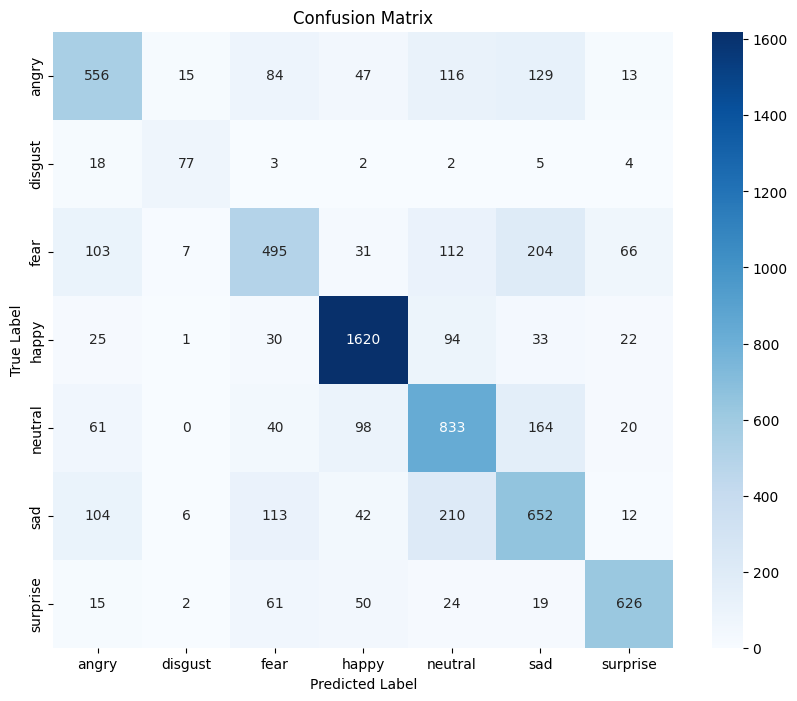

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 🧩 Bước 0: Load model (nếu chưa load)
# model = load_model("duong_dan_toi_model.h5")  # Bỏ comment nếu cần

# 🧩 Bước 1: Tạo lại validation_generator
val_dir = 'D:/DatasetDoAnCoSO/dataset_emotion/images/validation'  # ✅ Thay đường dẫn đúng

validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(56, 56),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

# 🧩 Bước 2: Dự đoán toàn bộ tập validation
y_pred_prob = model.predict(validation_generator, verbose=1)  # ❌ KHÔNG dùng `steps=...`
y_pred_class = np.argmax(y_pred_prob, axis=1)

# 🧩 Bước 3: Lấy nhãn thật và in Classification Report
y_true = validation_generator.classes
target_names = list(validation_generator.class_indices.keys())

print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred_class, target_names=target_names))

# 🧩 Bước 4: Vẽ Confusion Matrix
cm = confusion_matrix(y_true, y_pred_class)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [15]:
from tensorflow.keras.models import load_model

model = load_model('full_model_notEarlyStop.keras')

Found 7066 images belonging to 7 classes.


c:\Program Files\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


111/111 ━━━━━━━━━━━━━━━━━━━━ 18s 159ms/step

📋 Classification Report:
              precision    recall  f1-score   support

       angry       0.58      0.43      0.49       960
     disgust       0.60      0.47      0.53       111
        fear       0.58      0.20      0.30      1018
       happy       0.84      0.85      0.85      1825
     neutral       0.49      0.74      0.59      1216
         sad       0.50      0.46      0.48      1139
    surprise       0.58      0.85      0.69       797

    accuracy                           0.61      7066
   macro avg       0.60      0.57      0.56      7066
weighted avg       0.62      0.61      0.59      7066



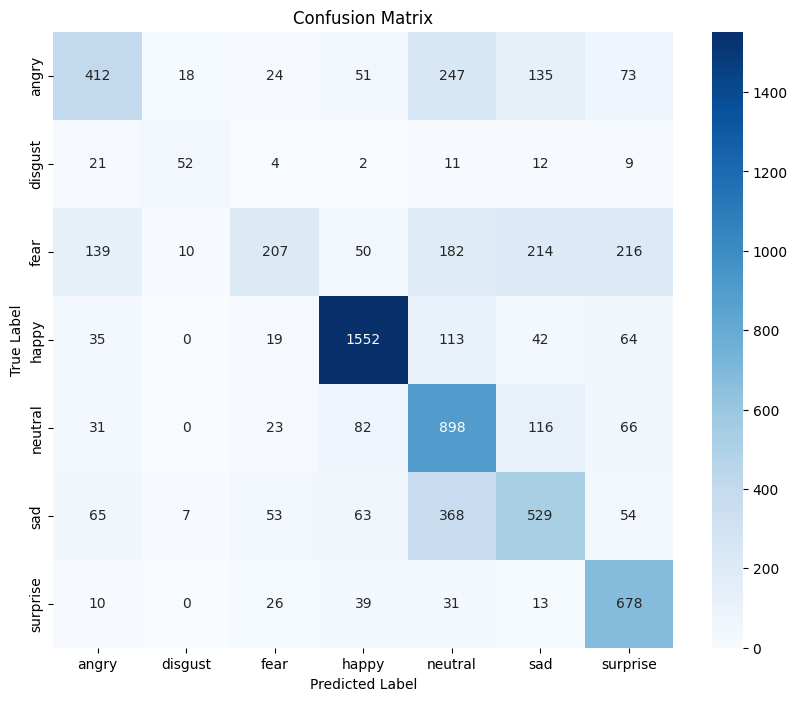

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 🧩 Bước 0: Load model (nếu chưa load)
# model = load_model("duong_dan_toi_model.h5")  # Bỏ comment nếu cần

# 🧩 Bước 1: Tạo lại validation_generator
val_dir = 'D:/DatasetDoAnCoSO/dataset_emotion/images/validation'  # ✅ Thay đường dẫn đúng

validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(56, 56),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

# 🧩 Bước 2: Dự đoán toàn bộ tập validation
y_pred_prob = model.predict(validation_generator, verbose=1)  # ❌ KHÔNG dùng `steps=...`
y_pred_class = np.argmax(y_pred_prob, axis=1)

# 🧩 Bước 3: Lấy nhãn thật và in Classification Report
y_true = validation_generator.classes
target_names = list(validation_generator.class_indices.keys())

print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred_class, target_names=target_names))

# 🧩 Bước 4: Vẽ Confusion Matrix
cm = confusion_matrix(y_true, y_pred_class)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()